In [1]:
from datacube import Datacube
from datacube.storage.masking import mask_invalid_data
%matplotlib inline
import sys
import os
sys.path.append(os.path.expanduser('~/dea-notebooks/10_Scripts/'))
import SpatialTools
import DEADataHandling

In [2]:
dc = Datacube(config='/g/data/u46/users/dra547/modis_oc.conf')

In [3]:
data = dc.load(product='modis_oc_1d', time=('2016-01-01', '2016-01-05'), resolution=(-0.01, 0.01), measurements=('sst',))

In [4]:
data

<xarray.Dataset>
Dimensions:    (latitude: 7002, longitude: 10002, time: 5)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01T11:59:59.999999 ...
  * latitude   (latitude) float64 10.0 9.995 9.985 9.975 9.965 9.955 9.945 ...
  * longitude  (longitude) float64 79.99 80.0 80.01 80.02 80.03 80.04 80.05 ...
Data variables:
    sst        (time, latitude, longitude) float32 -999.0 -999.0 -999.0 ...
Attributes:
    crs:      EPSG:4326

In [5]:
sst_test = data.sst[1,300:400,500:600]

In [6]:
sst_test

<xarray.DataArray 'sst' (latitude: 100, longitude: 100)>
array([[  29.395,   29.21 ,   29.21 , ..., -999.   ,   29.225,   29.3  ],
       [  29.29 , -999.   , -999.   , ..., -999.   ,   29.195,   29.195],
       [  29.29 ,   29.445,   29.445, ..., -999.   , -999.   , -999.   ],
       ...,
       [-999.   , -999.   , -999.   , ..., -999.   , -999.   , -999.   ],
       [-999.   , -999.   ,   28.8  , ..., -999.   , -999.   , -999.   ],
       [  29.1  ,   28.8  ,   28.8  , ...,   29.455, -999.   , -999.   ]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 2016-01-02T11:59:59.999999
  * latitude   (latitude) float64 7.005 6.995 6.985 6.975 6.965 6.955 6.945 ...
  * longitude  (longitude) float64 84.99 85.0 85.01 85.02 85.03 85.04 85.05 ...
Attributes:
    units:    Celsius
    nodata:   -999.0
    crs:      EPSG:4326

In [8]:
sst_test_tpi = SpatialTools.calculte_tpi(sst_test,neighborhood='Rectangle',nodata=-999)

In [15]:
sst_test_tpi.max()

<xarray.DataArray 'sst' ()>
array(0.448332)
Coordinates:
    time     datetime64[ns] 2016-01-02T11:59:59.999999

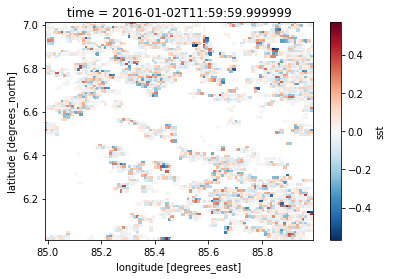

In [13]:
sst_test_tpi.plot()

In [16]:
sst1 = data.sst[1]

In [18]:
sst1_tpi = SpatialTools.calculte_tpi(sst1,neighborhood='Rectangle')

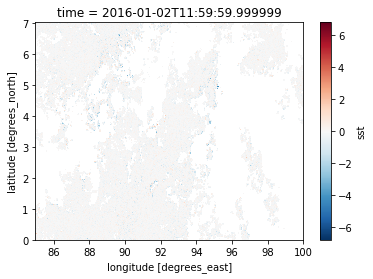

In [28]:
sst1_tpi[300:1000,500:2000].plot()

In [4]:
data = mask_invalid_data(data)

In [31]:
sst_test = data.sst[1,300:400,500:600]

In [32]:
sst_test

<xarray.DataArray 'sst' (latitude: 100, longitude: 100)>
array([[29.395, 29.21 , 29.21 , ...,    nan, 29.225, 29.3  ],
       [29.29 ,    nan,    nan, ...,    nan, 29.195, 29.195],
       [29.29 , 29.445, 29.445, ...,    nan,    nan,    nan],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan, 28.8  , ...,    nan,    nan,    nan],
       [29.1  , 28.8  , 28.8  , ..., 29.455,    nan,    nan]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2016-01-02T11:59:59.999999
  * latitude   (latitude) float64 7.005 6.995 6.985 6.975 6.965 6.955 6.945 ...
  * longitude  (longitude) float64 84.99 85.0 85.01 85.02 85.03 85.04 85.05 ...
Attributes:
    units:    Celsius
    nodata:   -999.0
    crs:      EPSG:4326

In [33]:
sst_test_tpi = SpatialTools.calculte_tpi(sst_test,neighborhood='Rectangle',nodata=-999)

In [36]:
sst_test_tpi.max()

<xarray.DataArray 'sst' ()>
array(0.448332)
Coordinates:
    time     datetime64[ns] 2016-01-02T11:59:59.999999

In [37]:
sst2 = data.sst[1]

In [38]:
sst2_tpi = SpatialTools.calculte_tpi(sst2,neighborhood='Rectangle')

In [47]:
sst2_tpi.mean()

<xarray.DataArray 'sst' ()>
array(-0.003779)
Coordinates:
    time     datetime64[ns] 2016-01-02T11:59:59.999999

In [48]:
sst1_tpi.mean()

<xarray.DataArray 'sst' ()>
array(-0.003779)
Coordinates:
    time     datetime64[ns] 2016-01-02T11:59:59.999999

In [5]:
data2 = data.resample(time='5D').mean()

In [6]:
data2

<xarray.Dataset>
Dimensions:    (latitude: 7002, longitude: 10002, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01T11:59:59.999999
  * latitude   (latitude) float64 10.0 9.995 9.985 9.975 9.965 9.955 9.945 ...
  * longitude  (longitude) float64 79.99 80.0 80.01 80.02 80.03 80.04 80.05 ...
Data variables:
    sst        (time, latitude, longitude) float32 nan nan nan nan nan 26.85 ...

In [7]:
data2_sst_tpi = SpatialTools.calculte_tpi(data2.sst[0],neighborhood='Rectangle')

In [8]:
data2_sst_tpi

<xarray.DataArray 'sst' (latitude: 7002, longitude: 10002)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan, -0.09    ,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,  0.038334, ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,  0.012778,  0.043889, -0.191667],
       [      nan,       nan,       nan, ..., -0.015556,  0.050555,  0.105   ],
       [      nan,       nan,       nan, ...,  0.047222, -0.123889, -0.071667]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 2016-01-01T11:59:59.999999
  * latitude   (latitude) float64 10.0 9.995 9.985 9.975 9.965 9.955 9.945 ...
  * longitude  (longitude) float64 79.99 80.0 80.01 80.02 80.03 80.04 80.05 ...

In [10]:
from datacube.helpers import write_geotiff

In [24]:
data2_sst_tpi.attrs['crs'] = data.crs

In [29]:
sst_tpi = data2_sst_tpi.to_dataset()

In [31]:
sst_tpi.attrs['crs'] = data.crs

In [38]:
data2

<xarray.Dataset>
Dimensions:    (latitude: 7002, longitude: 10002, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01T11:59:59.999999
  * latitude   (latitude) float64 10.0 9.995 9.985 9.975 9.965 9.955 9.945 ...
  * longitude  (longitude) float64 79.99 80.0 80.01 80.02 80.03 80.04 80.05 ...
Data variables:
    sst        (time, latitude, longitude) float32 nan nan nan nan nan 26.85 ...
Attributes:
    crs:      EPSG:4326

In [39]:
write_geotiff?

In [35]:
write_geotiff('tpi_test.tif',sst_tpi)

In [36]:
write_geotiff('sst_test.tif',data2.isel(time=0))

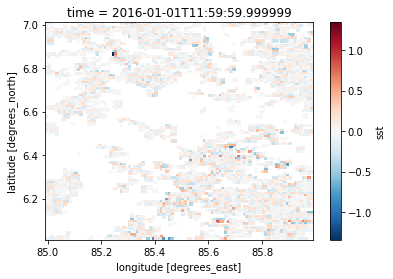

In [62]:
data2_sst_tpi[300:400,500:600].plot()

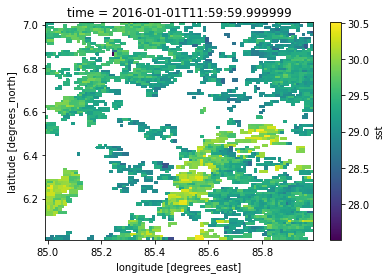

In [65]:
data2.sst[0,300:400,500:600].plot()

In [41]:
x = data2.sst[0]

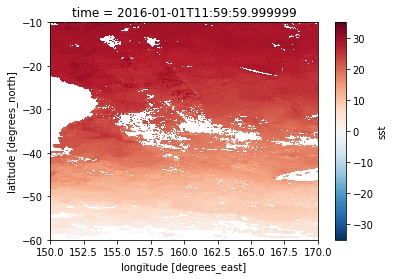

In [42]:
x.loc[-10:-60,150:170].plot()

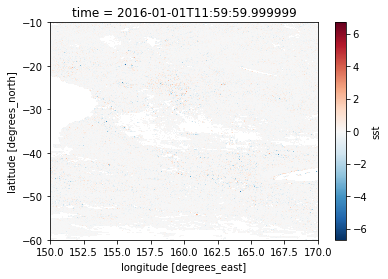

In [98]:
data2_sst_tpi.loc[-10:-60,150:170].plot()